In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\lenovo\\Datathon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\lenovo\Datathon\draft_1.ipynb
C:\Users\lenovo\Datathon\EDA.ipynb
C:\Users\lenovo\Datathon\sample_submission.csv
C:\Users\lenovo\Datathon\submission.csv
C:\Users\lenovo\Datathon\test.csv
C:\Users\lenovo\Datathon\train.csv
C:\Users\lenovo\Datathon\xgb_submission.csv
C:\Users\lenovo\Datathon\.ipynb_checkpoints\draft_1-checkpoint.ipynb
C:\Users\lenovo\Datathon\.ipynb_checkpoints\EDA-checkpoint.ipynb


In [3]:
train_df = pd.read_csv("C:\\Users\\lenovo\\Datathon\\train.csv")

In [4]:
test_df = pd.read_csv("C:\\Users\\lenovo\\Datathon\\test.csv")

In [5]:
train_df.head()

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,eac9059b997a667954a1c2f19079c463,NaN,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,BAT3016651,0.0,...,D2,Debt consolidation,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,841xx,28.0
1,f2bdbfe82b2a63a35726cb1a630af56a,NaN,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,BAT1184694,0.0,...,D2,Business,138.0,115674.0,11.84,0.0,49000.0,Verified,701xx,39.0
2,0a73ee5d7841b012f1fb62542d7664c7,NaN,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,BAT2078974,0.0,...,C1,Debt consolidation,0.0,40075.0,1689.09,0.0,17600.0,Verified,241xx,29.0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,BAT4106493,0.0,...,F2,Credit card refinancing,0.0,20459.0,348.68,0.0,20100.0,Source Verified,480xx,15.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,,0.0,...,B5,debt consolidation,0.0,100987.0,2164.96,0.0,15000.0,Verified,282xx,18.0


In [6]:
features_with_na=[features for features in train_df.columns if train_df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print('{} {}% missing values'.format(feature, np.round(train_df[feature].isnull().mean(), 4)))

time 0.0525% missing values
feature_4 0.1479% missing values
feature_9 0.0579% missing values
feature_19 0.5008% missing values
feature_20 0.7293% missing values
feature_21 0.8371% missing values
feature_27 0.0004% missing values
feature_29 0.0002% missing values


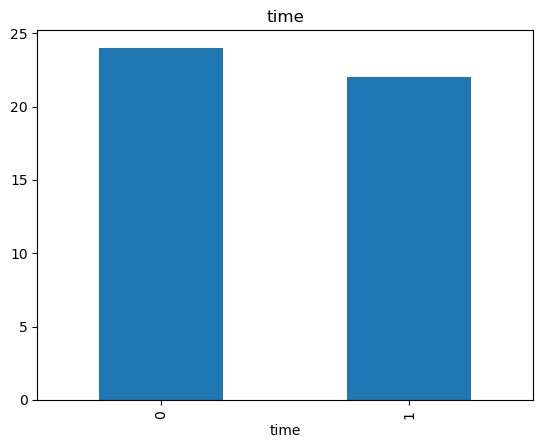

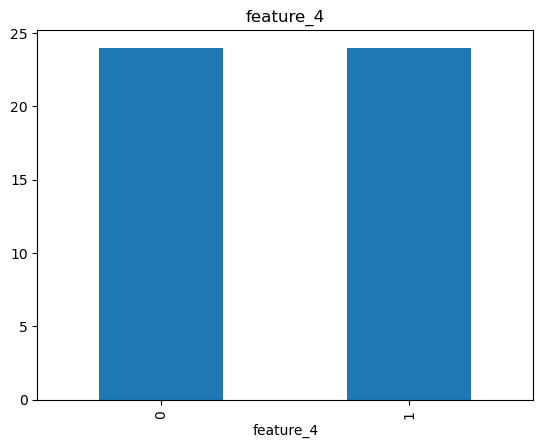

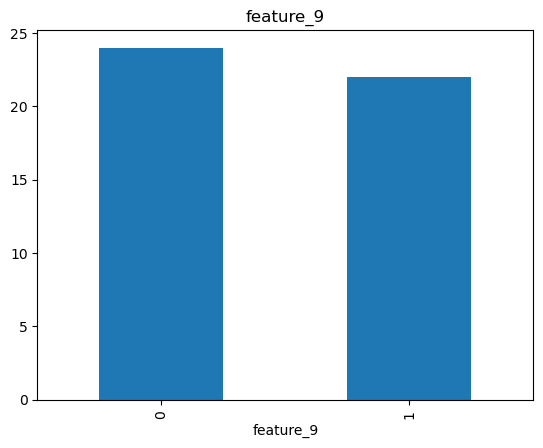

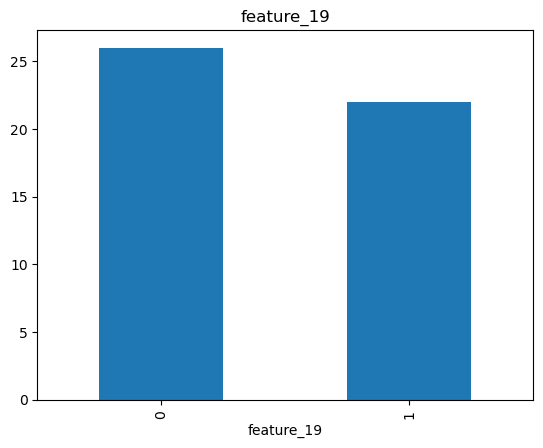

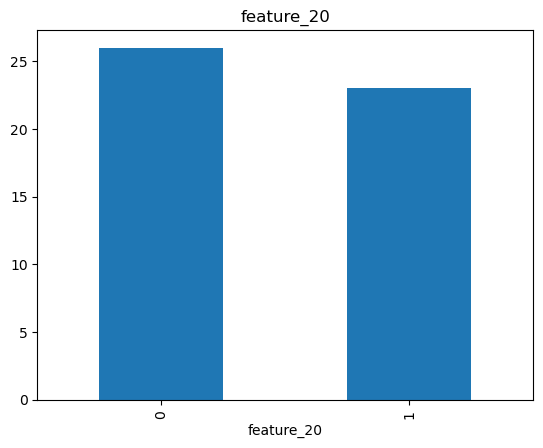

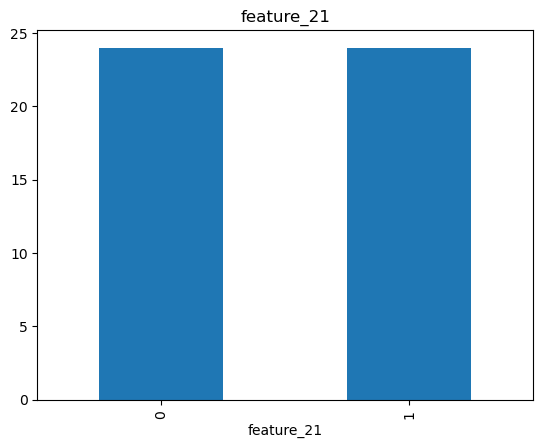

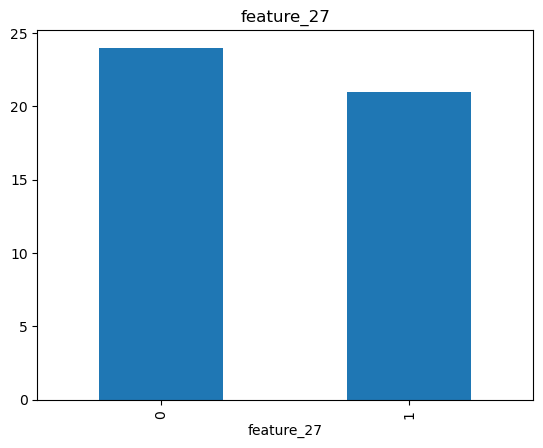

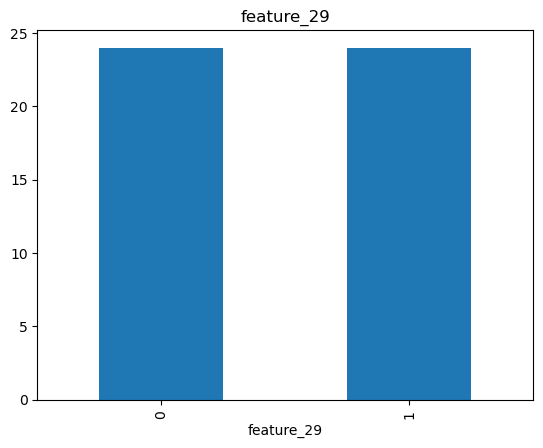

In [7]:
for feature in features_with_na:
    data = train_df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['target'].median().plot.bar()
    plt.title(feature)
    plt.show()

There is a relationship between missing valued features with target except features 4, 21, 29

In [8]:
train_df[['feature_4', 'feature_21', 'feature_29', 'target']]

,feature_4,feature_21,feature_29,target
0,BAT3016651,NaN,Debt consolidation,28.0
1,BAT1184694,NaN,Business,39.0
2,BAT2078974,NaN,Debt consolidation,29.0
3,BAT4106493,NaN,Credit card refinancing,15.0
4,,111.0,debt consolidation,18.0
...,...,...,...,...
419035,BAT2252229,NaN,Debt consolidation,27.0
419036,BAT4136152,NaN,Credit card refinancing,27.0
419037,,NaN,Credit card refinancing,46.0
419038,NaN,NaN,Debt consolidation,13.0


In [9]:
train_df.shape

(419040, 42)

In [10]:
trainDF = train_df.drop(columns=['feature_4', 'feature_21', 'feature_29'], axis=1)

In [11]:
trainDF.shape

(419040, 39)

In [12]:
print("Id {}".format(len(trainDF.id)))

Id 419040


## Numerical Variables

In [13]:

# list of numerical variables
numerical_features = [feature for feature in trainDF.columns if trainDF[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
trainDF[numerical_features].head()

Number of numerical variables:  24


,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
0,0.0,130000.0,0.0,0.0,0.0,18.89,25000,25000.0,4.0,17.57,...,0.0,0.0,34018.0,91.0,0.0,39779.0,5701.17,0.0,37400.0,28.0
1,0.0,50000.0,0.0,0.0,3.0,27.12,5000,5000.0,3.0,16.55,...,0.0,0.0,24808.0,50.6,138.0,115674.0,11.84,0.0,49000.0,39.0
2,0.0,40000.0,0.0,0.0,0.0,27.87,12500,12500.0,0.0,12.99,...,0.0,0.0,12417.0,70.6,0.0,40075.0,1689.09,0.0,17600.0,29.0
3,0.0,50000.0,0.0,0.0,1.0,18.24,21000,20950.0,3.0,22.99,...,0.0,0.0,2105.0,10.5,0.0,20459.0,348.68,0.0,20100.0,15.0
4,0.0,45000.0,0.0,0.0,0.0,13.31,9500,9500.0,0.0,14.09,...,1.0,0.0,10917.0,72.8,0.0,100987.0,2164.96,0.0,15000.0,18.0


In [14]:
trainDF.columns

Index(['id', 'time', 'duration', 'feature_0', 'checkpoint', 'feature_1',
       'feature_2', 'feature_3', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'target'],
      dtype='object')

In [15]:
trainDF[['time', 'duration','checkpoint', 'target']]

,time,duration,checkpoint,target
0,NaN,36 months,91th week,28.0
1,NaN,36 months,4th week,39.0
2,NaN,36 months,65th week,29.0
3,< 1 year,60 months,9th week,15.0
4,5 years,36 months,139th week,18.0
...,...,...,...,...
419035,10+ years,60 months,13th week,27.0
419036,9 years,36 months,22th week,27.0
419037,5 years,36 months,78th week,46.0
419038,2 years,36 months,56th week,13.0


In [16]:
trainDF.groupby("time").size()

time
1 year        26438
10+ years    140766
2 years       36616
3 years       32583
4 years       23998
5 years       25591
6 years       19909
7 years       21042
8 years       21191
9 years       16534
< 1 year      32384
dtype: int64

In [17]:
cols_train = trainDF.columns
num_cols_train = trainDF._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train

['feature_35',
 'feature_14',
 'time',
 'checkpoint',
 'feature_1',
 'id',
 'feature_3',
 'feature_36',
 'feature_13',
 'feature_12',
 'feature_23',
 'feature_24',
 'duration',
 'feature_28',
 'feature_9']

In [18]:
for col in cat_cols_train:
    print("{}:{}".format(col,trainDF[col].unique()))
    print()

feature_35:['Source Verified' 'Verified' 'Not Verified']

feature_14:['w' 'f']

time:[nan '< 1 year' '5 years' '8 years' '3 years' '10+ years' '1 year'
 '2 years' '9 years' '7 years' '4 years' '6 years']

checkpoint:['91th week' '4th week' '65th week' '9th week' '139th week' '17th week'
 '113th week' '74th week' '52th week' '69th week' '117th week' '35th week'
 '43th week' '87th week' '22th week' '78th week' '13th week' '26th week'
 '61th week' '31th week' '100th week' '48th week' '152th week' '83th week'
 '39th week' '143th week' '82th week' '131th week' '56th week'
 '126th week' 'NAth week' '44th week' '156th week' '96th week' '70th week'
 '57th week' '104th week' '144th week' '8th week' '109th week'
 '135th week' '122th week' '30th week' '95th week' '148th week'
 '130th week' '18th week' '21th week' '161th week' '169th week'
 '92th week' '108th week' '178th week' '121th week' '0th week'
 '170th week' '165th week' '174th week']

feature_1:['UT' 'LA' 'VA' 'MI' 'NC' 'FL' 'AZ' 'WI' 'KY'

feature_12:['D' 'C' 'F' 'B' 'E' 'A' 'G']

feature_23:['debt_consolidation' 'small_business' 'credit_card' 'home_improvement'
 'medical' 'other' 'major_purchase' 'car' 'vacation' 'house' 'moving'
 'wedding' 'renewable_energy']

feature_24:['n' 'y']

duration:['36 months' '60 months']

feature_28:['D2' 'C1' 'F2' 'B5' 'C4' 'C2' 'D1' 'E1' 'B4' 'D5' 'C5' 'A3' 'C3' 'E3'
 'F1' 'D3' 'A2' 'B2' 'A5' 'B1' 'B3' 'E2' 'A1' 'G1' 'G4' 'D4' 'F5' 'A4'
 'F3' 'F4' 'G2' 'E5' 'E4' 'G3' 'G5']

feature_9:[nan 'Sales Rep' 'advance auto parts' ... 'Production  Manager'
 'Forlit driver' 'Fingerprint Technician']



In [19]:
trainDF.drop(columns=["id", "feature_36"], axis=1, inplace=True)

In [20]:
cols_train = trainDF.columns
num_cols_train = trainDF._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train

['feature_35',
 'feature_14',
 'time',
 'feature_28',
 'checkpoint',
 'feature_1',
 'feature_3',
 'feature_12',
 'feature_23',
 'feature_24',
 'duration',
 'feature_13',
 'feature_9']

In [21]:
for col in cat_cols_train:
    print("{}:{}".format(col,trainDF[col].unique()))
    print()

feature_35:['Source Verified' 'Verified' 'Not Verified']

feature_14:['w' 'f']

time:[nan '< 1 year' '5 years' '8 years' '3 years' '10+ years' '1 year'
 '2 years' '9 years' '7 years' '4 years' '6 years']

feature_28:['D2' 'C1' 'F2' 'B5' 'C4' 'C2' 'D1' 'E1' 'B4' 'D5' 'C5' 'A3' 'C3' 'E3'
 'F1' 'D3' 'A2' 'B2' 'A5' 'B1' 'B3' 'E2' 'A1' 'G1' 'G4' 'D4' 'F5' 'A4'
 'F3' 'F4' 'G2' 'E5' 'E4' 'G3' 'G5']

checkpoint:['91th week' '4th week' '65th week' '9th week' '139th week' '17th week'
 '113th week' '74th week' '52th week' '69th week' '117th week' '35th week'
 '43th week' '87th week' '22th week' '78th week' '13th week' '26th week'
 '61th week' '31th week' '100th week' '48th week' '152th week' '83th week'
 '39th week' '143th week' '82th week' '131th week' '56th week'
 '126th week' 'NAth week' '44th week' '156th week' '96th week' '70th week'
 '57th week' '104th week' '144th week' '8th week' '109th week'
 '135th week' '122th week' '30th week' '95th week' '148th week'
 '130th week' '18th week' '21th w

In [22]:
trainDF[["time", "checkpoint", "feature_23", "feature_12", "feature_14", "feature_28", "feature_13", "feature_9", "target"]]

,time,checkpoint,feature_23,feature_12,feature_14,feature_28,feature_13,feature_9,target
0,NaN,91th week,debt_consolidation,D,w,D2,RENT,NaN,28.0
1,NaN,4th week,small_business,D,f,D2,RENT,NaN,39.0
2,NaN,65th week,debt_consolidation,C,f,C1,MORTGAGE,NaN,29.0
3,< 1 year,9th week,credit_card,F,f,F2,OWN,Sales Rep,15.0
4,5 years,139th week,debt_consolidation,B,f,B5,MORTGAGE,advance auto parts,18.0
...,...,...,...,...,...,...,...,...,...
419035,10+ years,13th week,debt_consolidation,E,w,E3,MORTGAGE,Sr. Engineering Technician,27.0
419036,9 years,22th week,credit_card,B,f,B1,MORTGAGE,Agent,27.0
419037,5 years,78th week,credit_card,C,f,C2,MORTGAGE,Department of Homeland Security,46.0
419038,2 years,56th week,debt_consolidation,A,w,A4,RENT,Sales Manager,13.0


In [23]:
trainDF.groupby("feature_23").size()

feature_23
car                     3405
credit_card            99941
debt_consolidation    251178
home_improvement       24238
house                   1480
major_purchase          7346
medical                 3831
moving                  2347
other                  18762
renewable_energy         229
small_business          3728
vacation                2095
wedding                  460
dtype: int64

In [24]:
print(trainDF.groupby("feature_9").size())

feature_9
\tAdv Mtr Proj Fld Rep                     1
 (RED),  a division of The ONE Campaign    1
 A Red Thread Adoption Services, Inc.      1
 AVP, Private Client Support               1
 Appellate Chief, Assistant US Attorney    1
                                          ..
zone supervisor                            1
zone vice president                        1
zoning inspector                           1
zookeeper                                  1
zulily                                     1
Length: 143908, dtype: int64


In [25]:
print(trainDF.groupby("time").size())

time
1 year        26438
10+ years    140766
2 years       36616
3 years       32583
4 years       23998
5 years       25591
6 years       19909
7 years       21042
8 years       21191
9 years       16534
< 1 year      32384
dtype: int64


In [26]:
trainDF.drop(columns=["duration", "checkpoint"], axis=1, inplace=True)

In [27]:
trainDF.drop(columns=["feature_1"], axis=1, inplace=True)

In [28]:
trainDF.head()

,time,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,NaN,0.0,130000.0,INDIVIDUAL,0.0,0.0,0.0,18.89,NaN,25000,...,34018.0,91.0,D2,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,28.0
1,NaN,0.0,50000.0,INDIVIDUAL,0.0,0.0,3.0,27.12,NaN,5000,...,24808.0,50.6,D2,138.0,115674.0,11.84,0.0,49000.0,Verified,39.0
2,NaN,0.0,40000.0,INDIVIDUAL,0.0,0.0,0.0,27.87,NaN,12500,...,12417.0,70.6,C1,0.0,40075.0,1689.09,0.0,17600.0,Verified,29.0
3,< 1 year,0.0,50000.0,INDIVIDUAL,0.0,0.0,1.0,18.24,Sales Rep,21000,...,2105.0,10.5,F2,0.0,20459.0,348.68,0.0,20100.0,Source Verified,15.0
4,5 years,0.0,45000.0,INDIVIDUAL,0.0,0.0,0.0,13.31,advance auto parts,9500,...,10917.0,72.8,B5,0.0,100987.0,2164.96,0.0,15000.0,Verified,18.0


In [29]:
trainDF["feature_0"].unique()

array([0., 1., 2., 3., 5., 4., 6.])

In [30]:
trainDF["feature_9"].mode()

0    Teacher
Name: feature_9, dtype: object

In [31]:
def categorical_values(df):
    cols_train = df.columns
    num_cols_train = df._get_numeric_data().columns
    cat_cols_train = list(set(cols_train) - set(num_cols_train))
    for col in cat_cols_train:
        print("{}:{}".format(col,df[col].unique()))
        print()
categorical_values(trainDF)

feature_35:['Source Verified' 'Verified' 'Not Verified']

feature_14:['w' 'f']

time:[nan '< 1 year' '5 years' '8 years' '3 years' '10+ years' '1 year'
 '2 years' '9 years' '7 years' '4 years' '6 years']

feature_3:['INDIVIDUAL' 'JOINT']

feature_13:['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']

feature_12:['D' 'C' 'F' 'B' 'E' 'A' 'G']

feature_23:['debt_consolidation' 'small_business' 'credit_card' 'home_improvement'
 'medical' 'other' 'major_purchase' 'car' 'vacation' 'house' 'moving'
 'wedding' 'renewable_energy']

feature_24:['n' 'y']

feature_28:['D2' 'C1' 'F2' 'B5' 'C4' 'C2' 'D1' 'E1' 'B4' 'D5' 'C5' 'A3' 'C3' 'E3'
 'F1' 'D3' 'A2' 'B2' 'A5' 'B1' 'B3' 'E2' 'A1' 'G1' 'G4' 'D4' 'F5' 'A4'
 'F3' 'F4' 'G2' 'E5' 'E4' 'G3' 'G5']

feature_9:[nan 'Sales Rep' 'advance auto parts' ... 'Production  Manager'
 'Forlit driver' 'Fingerprint Technician']



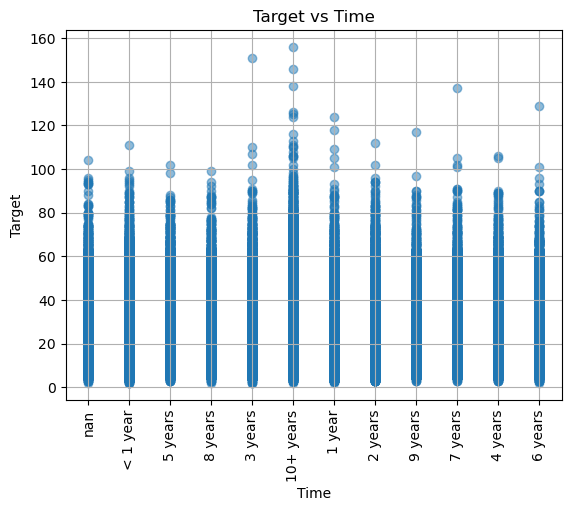

In [32]:
plt.scatter(train_df['time'].astype(str), train_df['target'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Time")
plt.grid()
plt.show()

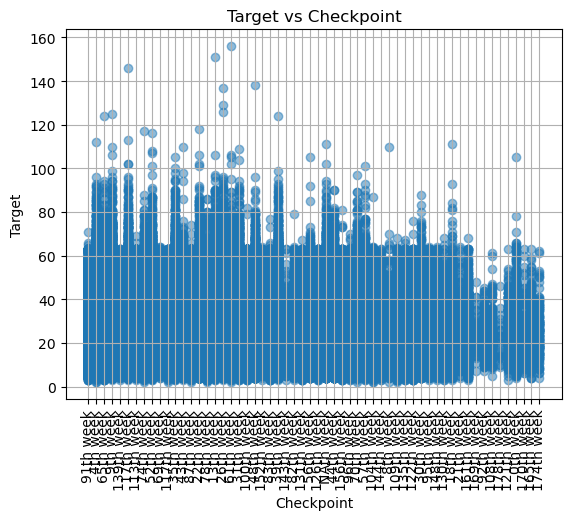

In [33]:
plt.scatter(train_df['checkpoint'], train_df['target'], alpha=0.5)
plt.xlabel('Checkpoint')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Checkpoint")
plt.grid()
plt.show()

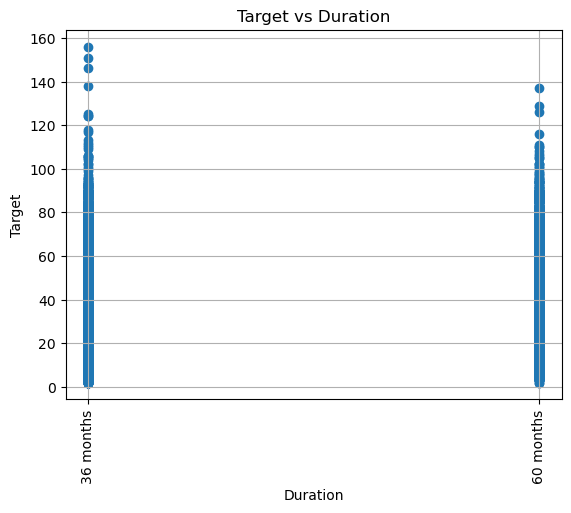

In [34]:
plt.scatter(train_df['duration'], train_df['target'])
plt.xlabel('Duration')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Duration")
plt.grid()
plt.show()

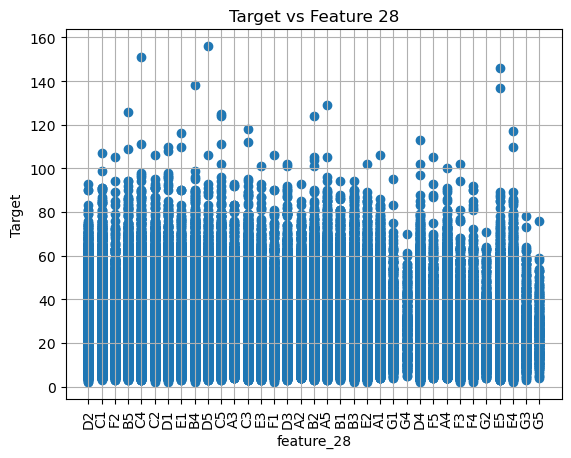

In [35]:
plt.scatter(train_df['feature_28'], train_df['target'])
plt.xlabel('feature_28')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 28")
plt.grid()
plt.show()

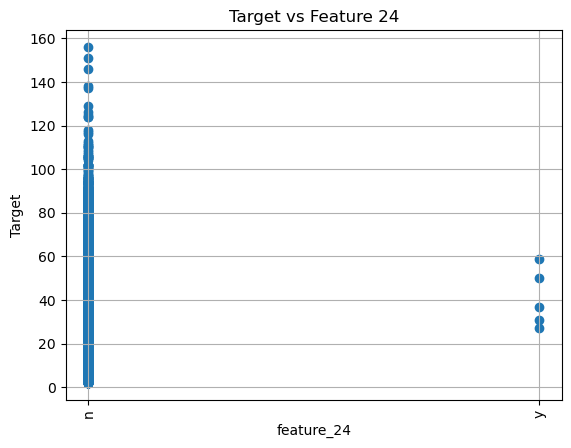

In [36]:
plt.scatter(train_df['feature_24'], train_df['target'])
plt.xlabel('feature_24')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 24")
plt.grid()
plt.show()

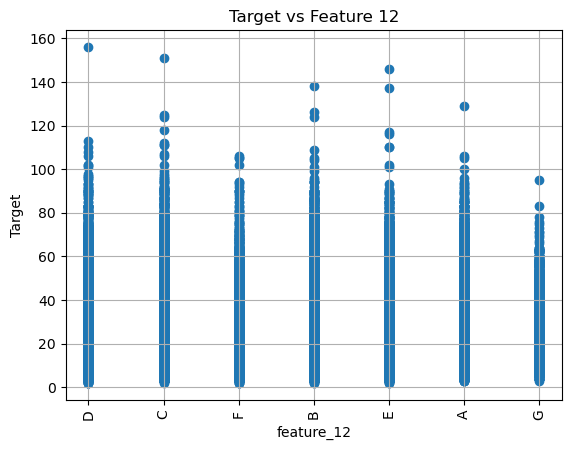

In [37]:
plt.scatter(train_df['feature_12'], train_df['target'])
plt.xlabel('feature_12')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 12")
plt.grid()
plt.show()

In [38]:
trainDF.drop(columns=["time", "feature_12", "feature_24", "feature_28"], axis=1, inplace=True)

In [39]:
categorical_values(trainDF)

feature_35:['Source Verified' 'Verified' 'Not Verified']

feature_14:['w' 'f']

feature_3:['INDIVIDUAL' 'JOINT']

feature_23:['debt_consolidation' 'small_business' 'credit_card' 'home_improvement'
 'medical' 'other' 'major_purchase' 'car' 'vacation' 'house' 'moving'
 'wedding' 'renewable_energy']

feature_13:['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']

feature_9:[nan 'Sales Rep' 'advance auto parts' ... 'Production  Manager'
 'Forlit driver' 'Fingerprint Technician']



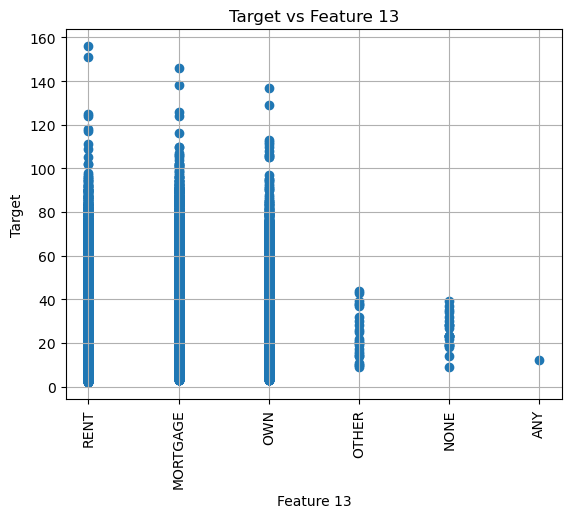

In [40]:
plt.scatter(train_df['feature_13'], train_df['target'])
plt.xlabel('Feature 13')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 13")
plt.grid()
plt.show()

In [41]:
trainDF.groupby('feature_9').size()

feature_9
\tAdv Mtr Proj Fld Rep                     1
 (RED),  a division of The ONE Campaign    1
 A Red Thread Adoption Services, Inc.      1
 AVP, Private Client Support               1
 Appellate Chief, Assistant US Attorney    1
                                          ..
zone supervisor                            1
zone vice president                        1
zoning inspector                           1
zookeeper                                  1
zulily                                     1
Length: 143908, dtype: int64

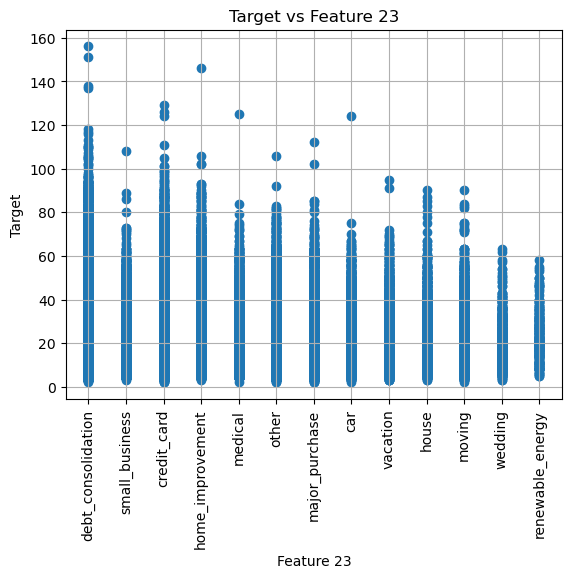

In [42]:
plt.scatter(train_df['feature_23'], train_df['target'])
plt.xlabel('Feature 23')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 23")
plt.grid()
plt.show()

In [43]:
trainDF.drop(columns=["feature_9", "feature_14"], axis=1, inplace=True)

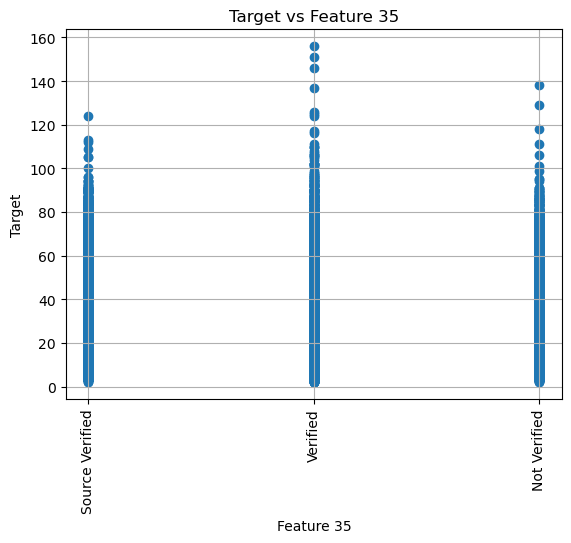

In [44]:
plt.scatter(train_df['feature_35'], train_df['target'])
plt.xlabel('Feature 35')
plt.ylabel('Target')
plt.xticks(rotation=90)
plt.title("Target vs Feature 35")
plt.grid()
plt.show()

In [45]:
discrete_feature=[feature for feature in numerical_features if len(trainDF[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [46]:
discrete_feature

['feature_0', 'feature_6', 'feature_7', 'feature_15']

In [47]:
trainDF[discrete_feature].head()

,feature_0,feature_6,feature_7,feature_15
0,0.0,0.0,0.0,4.0
1,0.0,0.0,3.0,3.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,3.0
4,0.0,0.0,0.0,0.0


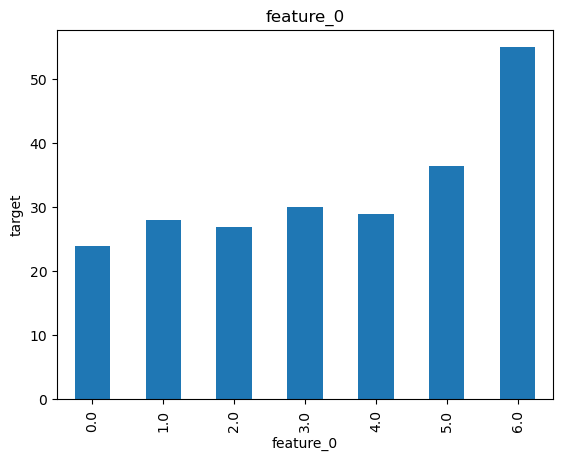

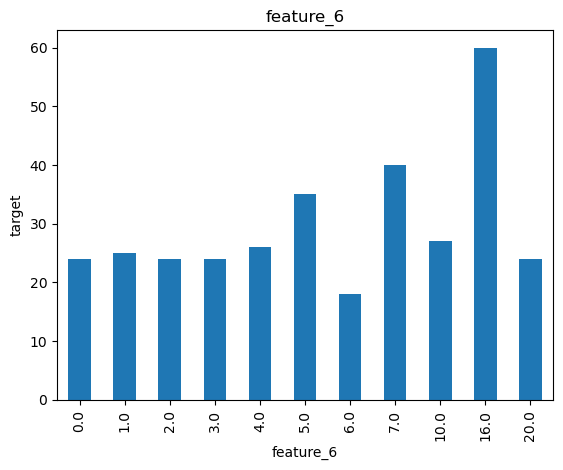

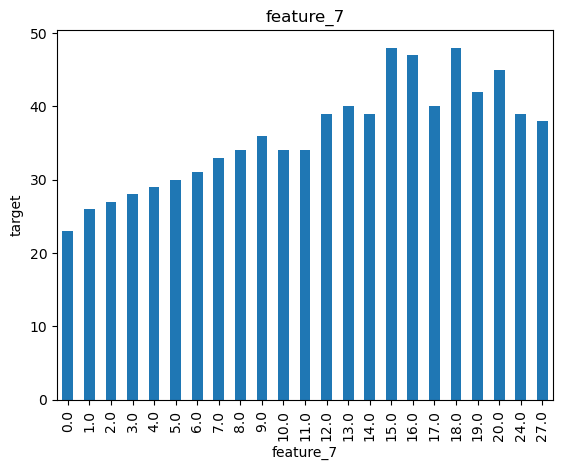

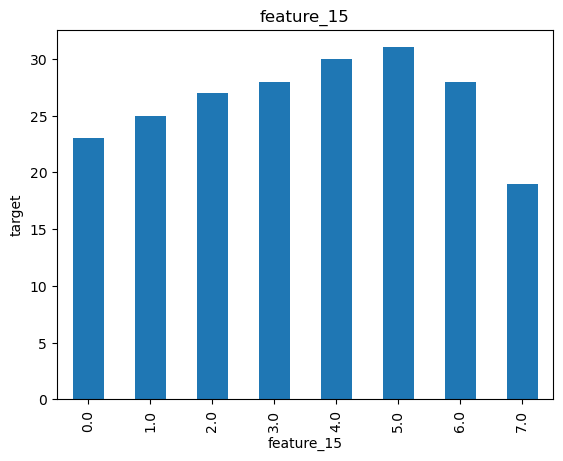

In [48]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=trainDF.copy()
    trainDF.groupby(feature)['target'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plt.show()

In [49]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 24


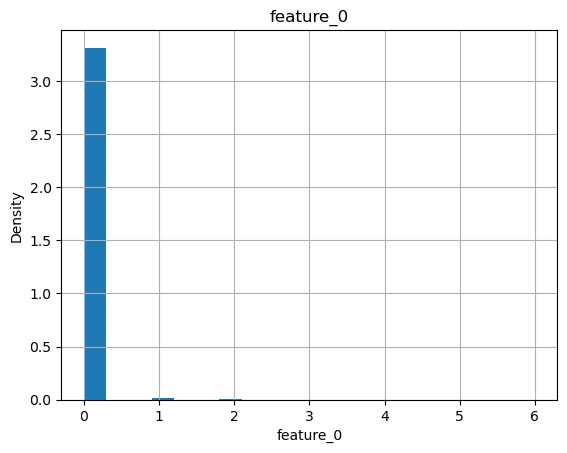

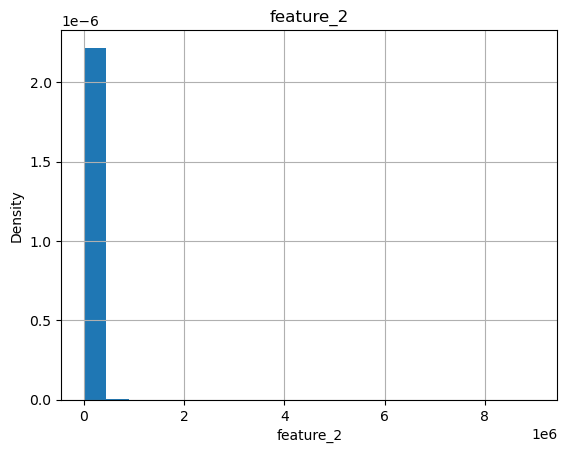

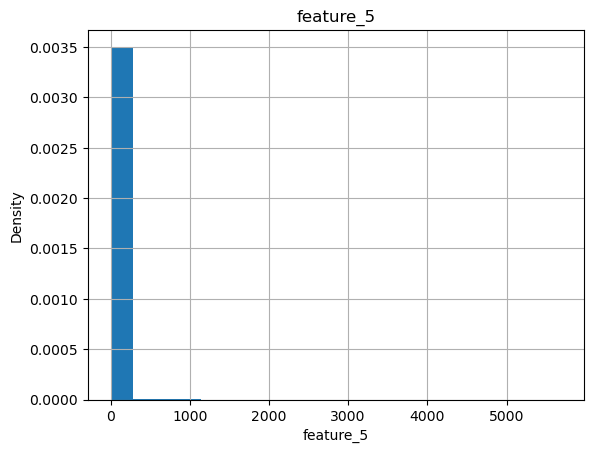

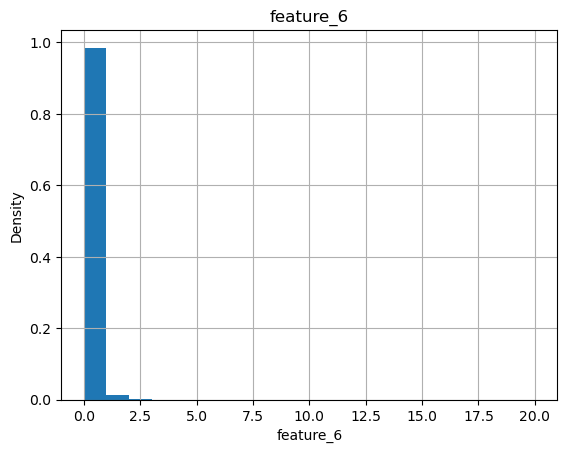

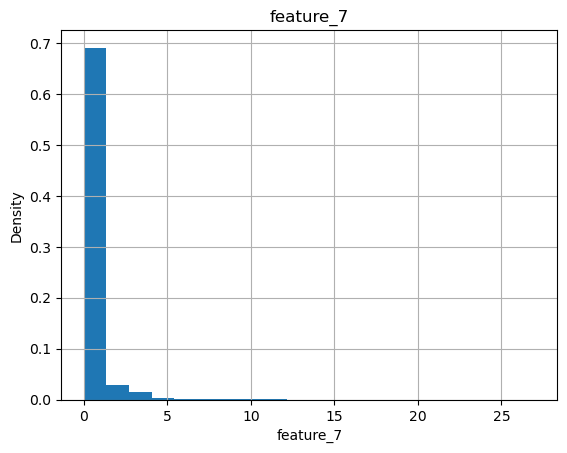

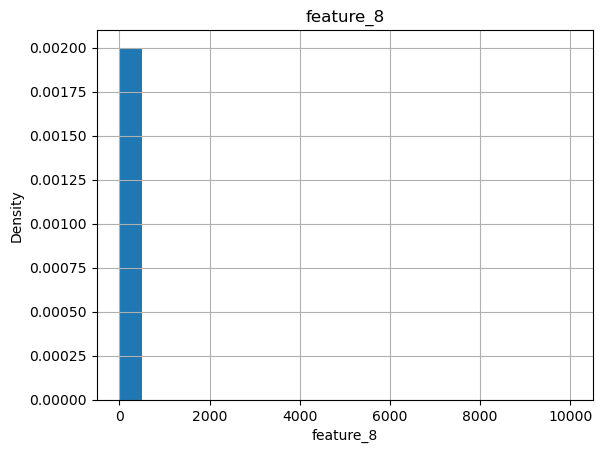

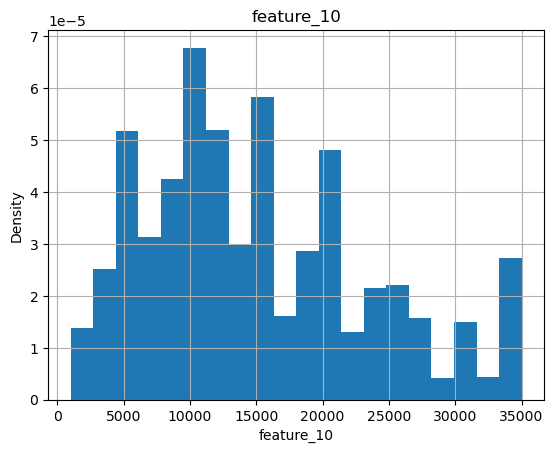

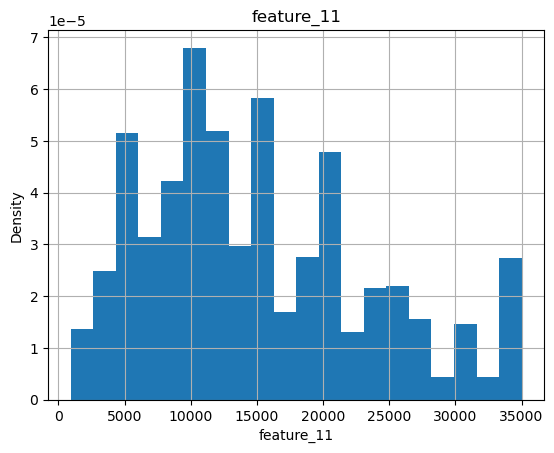

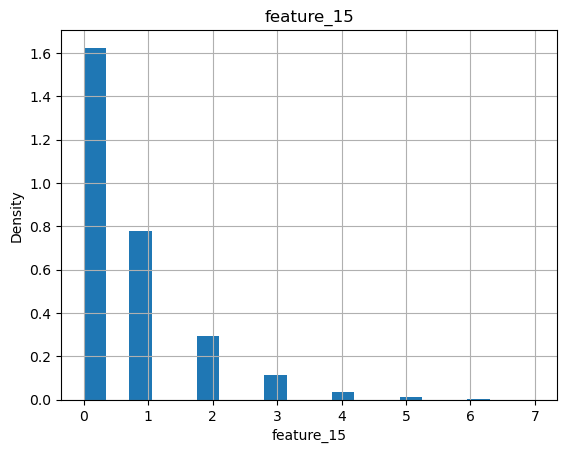

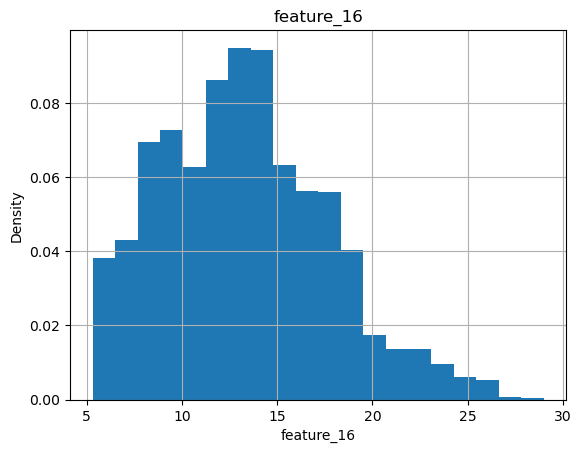

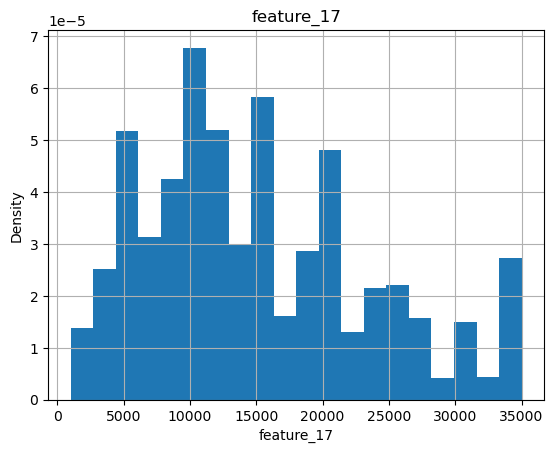

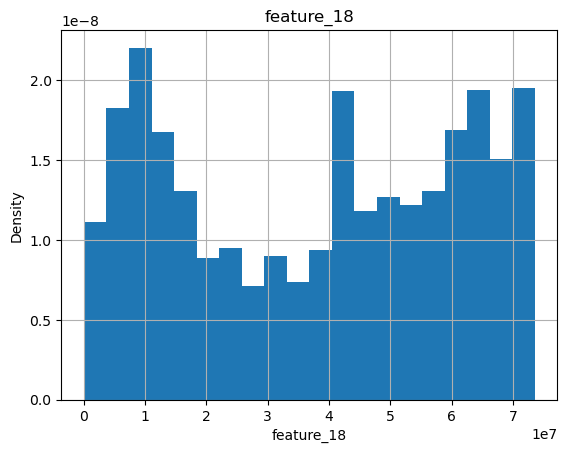

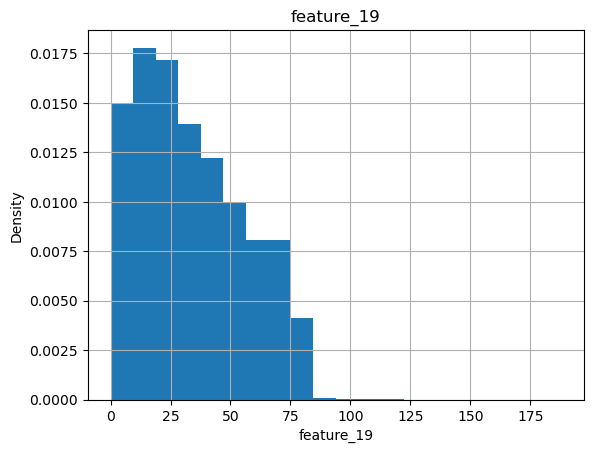

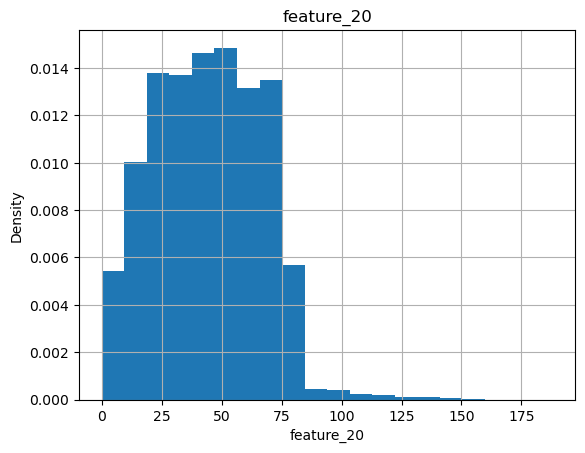

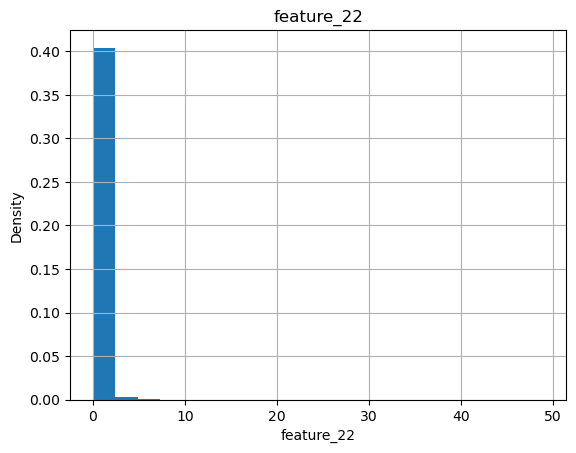

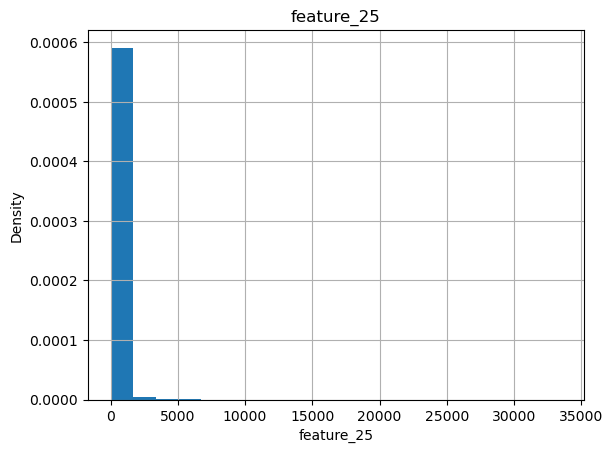

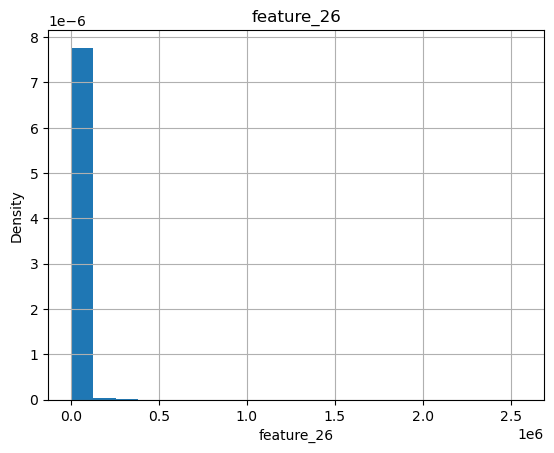

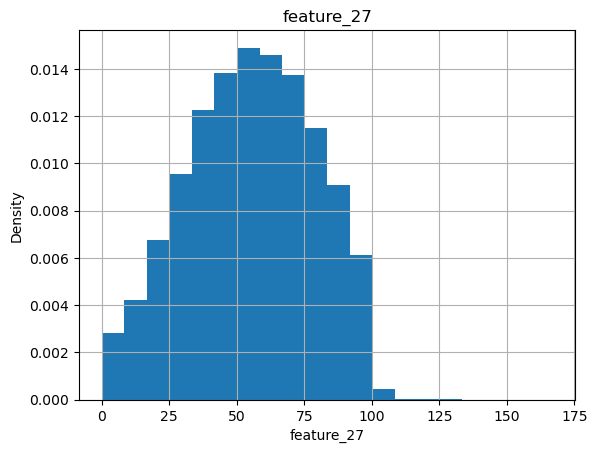

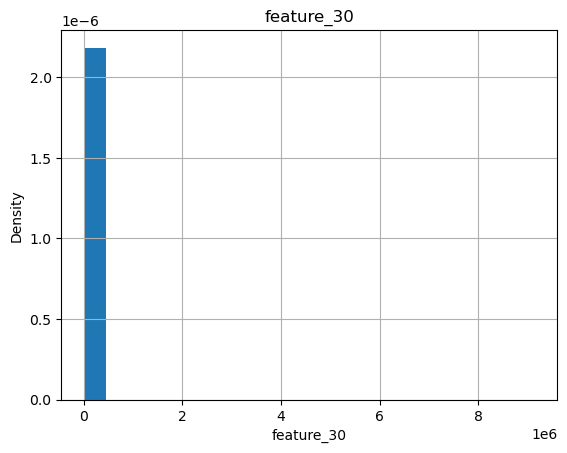

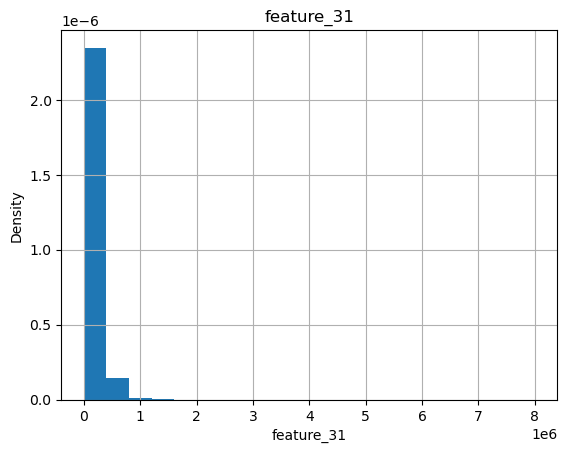

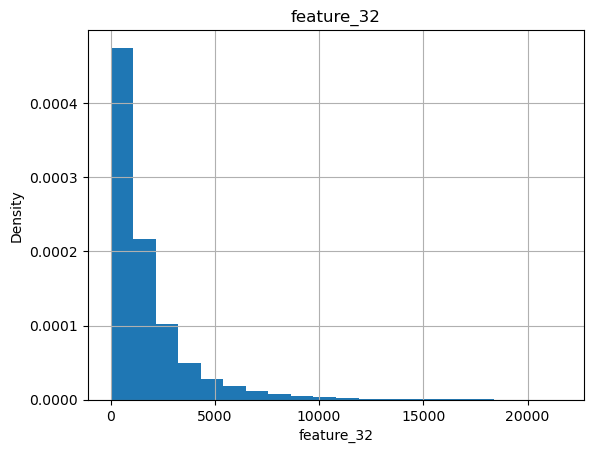

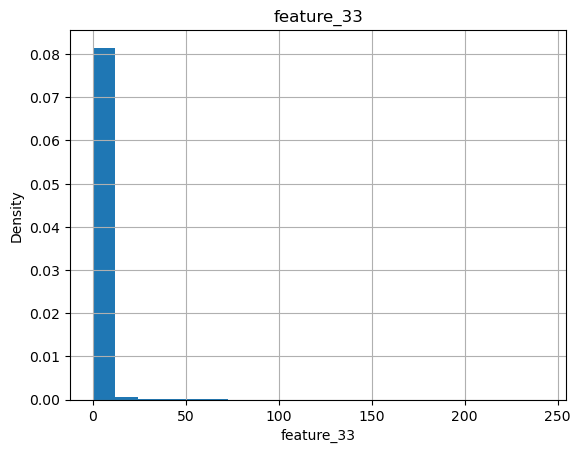

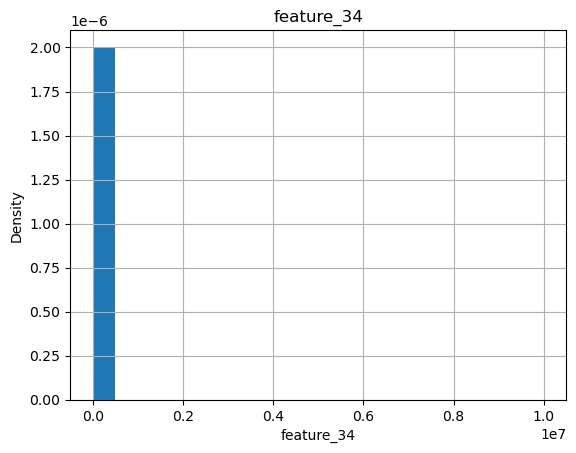

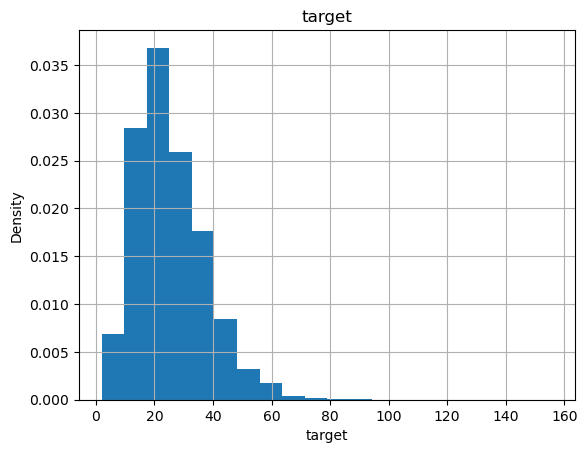

In [50]:
for feature in continuous_feature:
    data = trainDF.copy()
    data[feature].hist(bins=20, density=True)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(feature)
    plt.show()

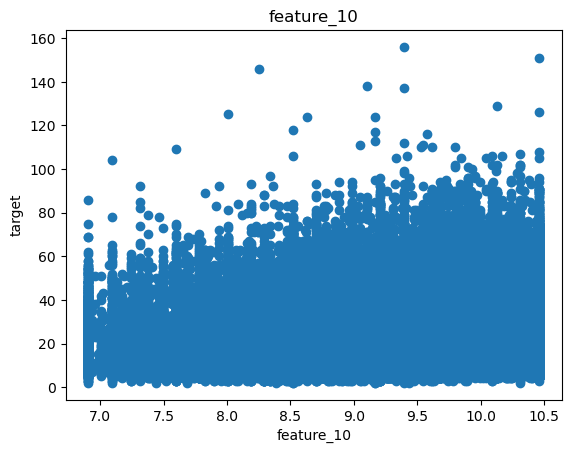

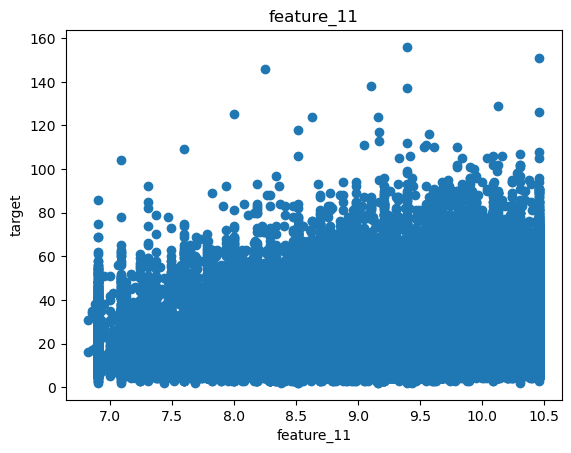

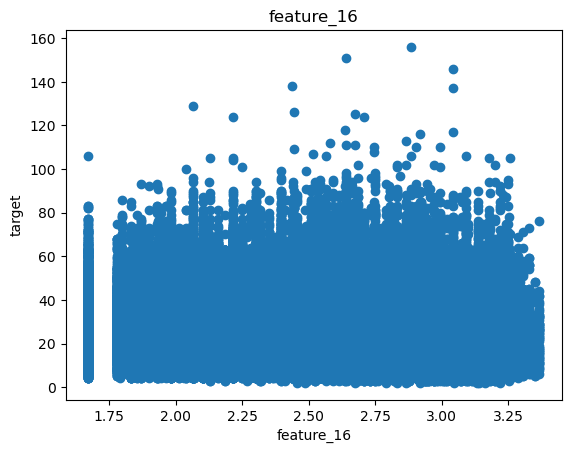

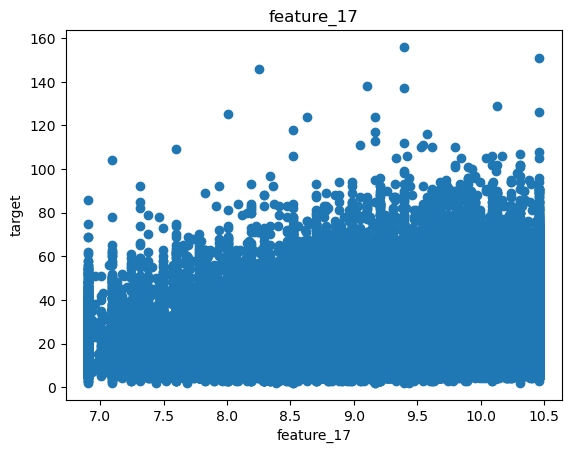

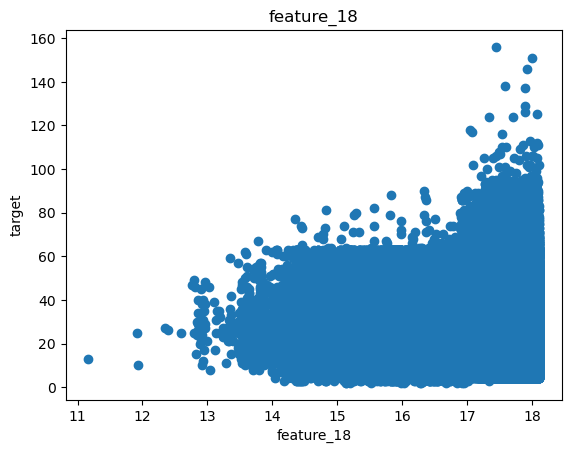

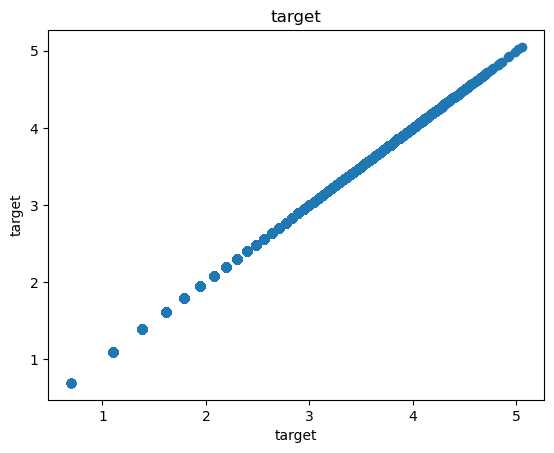

In [51]:
for feature in continuous_feature:
    data=trainDF.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['target']=data['target']
        plt.scatter(data[feature],data['target'])
        plt.xlabel(feature)
        plt.ylabel('target')
        plt.title(feature)
        plt.show()
        

feature_16, feature_18 needs to be dropped

In [52]:
trainDF.drop(columns=["feature_16", "feature_18"], axis=1, inplace=True)

In [53]:
trainDF.shape

(419040, 26)

In [57]:
continuous_feature.remove("feature_16")
continuous_feature.remove("feature_18")

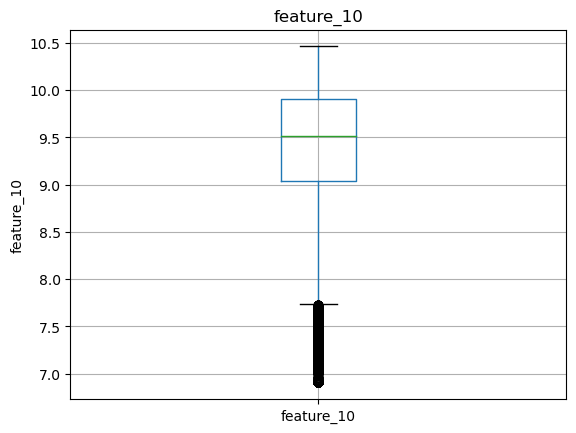

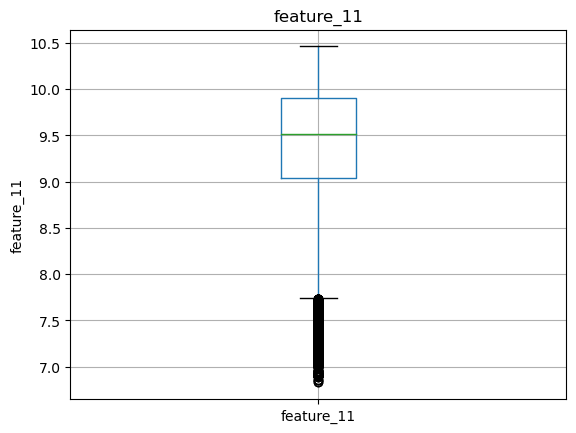

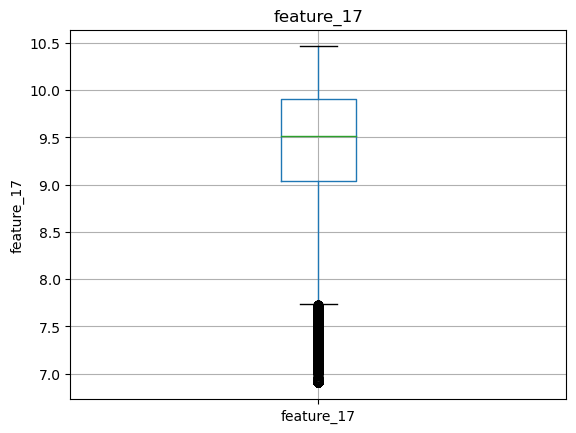

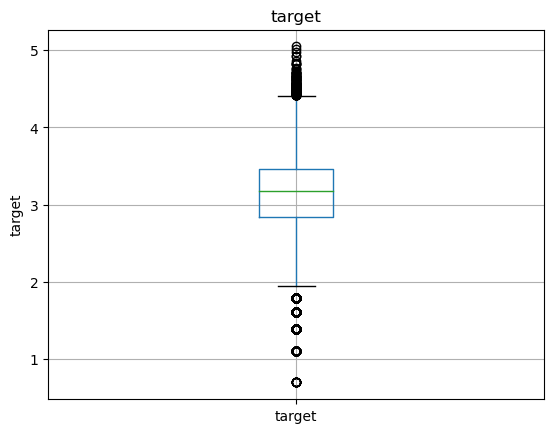

In [58]:
for feature in continuous_feature:
    data=trainDF.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [59]:
categorical_features=[feature for feature in trainDF.columns if data[feature].dtypes=='O']
categorical_features

['feature_3', 'feature_13', 'feature_23', 'feature_35']

In [60]:
trainDF[categorical_features].head()

,feature_3,feature_13,feature_23,feature_35
0,INDIVIDUAL,RENT,debt_consolidation,Source Verified
1,INDIVIDUAL,RENT,small_business,Verified
2,INDIVIDUAL,MORTGAGE,debt_consolidation,Verified
3,INDIVIDUAL,OWN,credit_card,Source Verified
4,INDIVIDUAL,MORTGAGE,debt_consolidation,Verified


In [61]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(trainDF[feature].unique())))


The feature is feature_3 and number of categories are 2
The feature is feature_13 and number of categories are 6
The feature is feature_23 and number of categories are 13
The feature is feature_35 and number of categories are 3


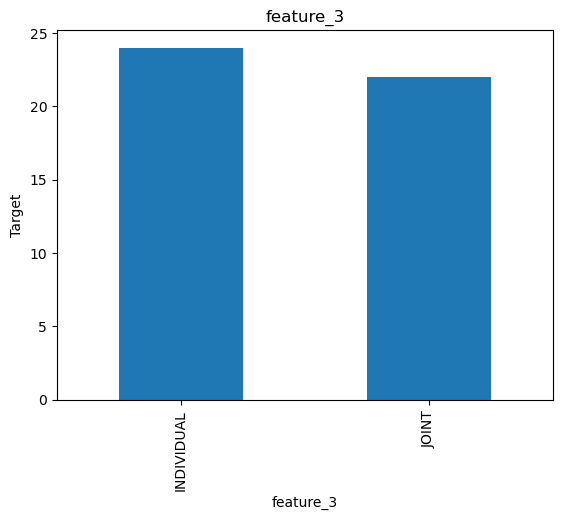

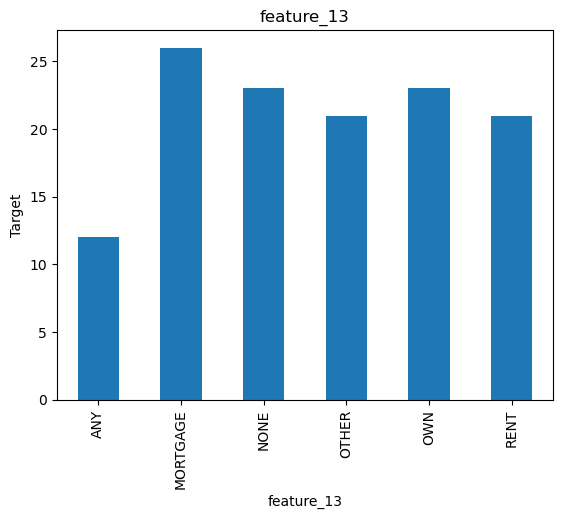

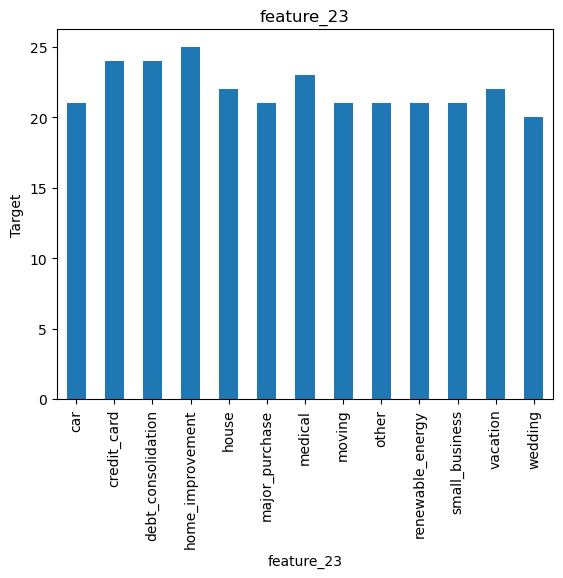

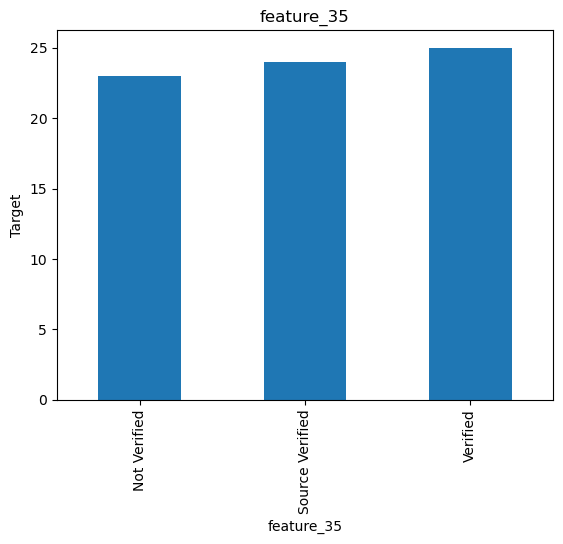

In [62]:
for feature in categorical_features:
    data=trainDF.copy()
    data.groupby(feature)['target'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

In [63]:
features_nan=[feature for feature in trainDF.columns if trainDF[feature].isnull().sum()>1 and trainDF[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(trainDF[feature].isnull().mean(),4)))

In [64]:
features_nan

[]

In [65]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

trainDF=replace_cat_feature(trainDF,features_nan)

trainDF[features_nan].isnull().sum()

Series([], dtype: float64)

In [66]:
trainDF.head()

,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,...,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target
0,0.0,130000.0,INDIVIDUAL,0.0,0.0,0.0,18.89,25000,25000.0,RENT,...,0.0,34018.0,91.0,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,28.0
1,0.0,50000.0,INDIVIDUAL,0.0,0.0,3.0,27.12,5000,5000.0,RENT,...,0.0,24808.0,50.6,138.0,115674.0,11.84,0.0,49000.0,Verified,39.0
2,0.0,40000.0,INDIVIDUAL,0.0,0.0,0.0,27.87,12500,12500.0,MORTGAGE,...,0.0,12417.0,70.6,0.0,40075.0,1689.09,0.0,17600.0,Verified,29.0
3,0.0,50000.0,INDIVIDUAL,0.0,0.0,1.0,18.24,21000,20950.0,OWN,...,0.0,2105.0,10.5,0.0,20459.0,348.68,0.0,20100.0,Source Verified,15.0
4,0.0,45000.0,INDIVIDUAL,0.0,0.0,0.0,13.31,9500,9500.0,MORTGAGE,...,0.0,10917.0,72.8,0.0,100987.0,2164.96,0.0,15000.0,Verified,18.0


In [67]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in trainDF.columns if trainDF[feature].isnull().sum()>1 and trainDF[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(trainDF[feature].isnull().mean(),4)))

feature_19: 0.5008% missing value
feature_20: 0.7293% missing value
feature_27: 0.0004% missing value


In [68]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=trainDF[feature].median()
    
    ## create a new feature to capture nan values
    trainDF[feature+'nan']=np.where(trainDF[feature].isnull(),1,0)
    trainDF[feature].fillna(median_value,inplace=True)
    
trainDF[numerical_with_nan].isnull().sum()

feature_19    0
feature_20    0
feature_27    0
dtype: int64

In [69]:
trainDF.head(50)

,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,...,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target,feature_19nan,feature_20nan,feature_27nan
0,0.0,130000.0,INDIVIDUAL,0.00,0.0,0.0,18.89,25000,25000.0,RENT,...,0.0,39779.0,5701.17,0.000000,37400.0,Source Verified,28.0,0,0,0
1,0.0,50000.0,INDIVIDUAL,0.00,0.0,3.0,27.12,5000,5000.0,RENT,...,138.0,115674.0,11.84,0.000000,49000.0,Verified,39.0,0,0,0
2,0.0,40000.0,INDIVIDUAL,0.00,0.0,0.0,27.87,12500,12500.0,MORTGAGE,...,0.0,40075.0,1689.09,0.000000,17600.0,Verified,29.0,1,1,0
3,0.0,50000.0,INDIVIDUAL,0.00,0.0,1.0,18.24,21000,20950.0,OWN,...,0.0,20459.0,348.68,0.000000,20100.0,Source Verified,15.0,0,1,0
4,0.0,45000.0,INDIVIDUAL,0.00,0.0,0.0,13.31,9500,9500.0,MORTGAGE,...,0.0,100987.0,2164.96,0.000000,15000.0,Verified,18.0,0,0,0
5,0.0,60000.0,INDIVIDUAL,0.00,0.0,0.0,3.90,10000,10000.0,MORTGAGE,...,0.0,157424.0,470.23,0.000000,13700.0,Not Verified,11.0,0,0,0
6,0.0,70000.0,INDIVIDUAL,0.00,0.0,0.0,15.45,19000,19000.0,MORTGAGE,...,0.0,30094.0,2663.04,0.000000,25300.0,Source Verified,25.0,0,0,0
7,0.0,34000.0,INDIVIDUAL,0.00,0.0,0.0,9.64,11500,11500.0,OWN,...,0.0,13818.0,3098.93,0.000000,22200.0,Not Verified,25.0,0,1,0
8,0.0,100000.0,INDIVIDUAL,0.00,0.0,0.0,3.29,30000,29950.0,MORTGAGE,...,0.0,281639.0,7363.33,0.000000,10000.0,Source Verified,7.0,1,1,0
9,0.0,95000.0,INDIVIDUAL,0.00,0.0,0.0,16.56,18000,18000.0,MORTGAGE,...,0.0,244021.0,138.32,0.000000,31500.0,Not Verified,18.0,1,1,0


In [70]:
num_features=['feature_10', 'feature_11', 'feature_17']

for feature in num_features:
    trainDF[feature]=np.log(trainDF[feature])

In [71]:
trainDF.head()

,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,...,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target,feature_19nan,feature_20nan,feature_27nan
0,0.0,130000.0,INDIVIDUAL,0.0,0.0,0.0,18.89,10.126631,10.126631,RENT,...,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,28.0,0,0,0
1,0.0,50000.0,INDIVIDUAL,0.0,0.0,3.0,27.12,8.517193,8.517193,RENT,...,138.0,115674.0,11.84,0.0,49000.0,Verified,39.0,0,0,0
2,0.0,40000.0,INDIVIDUAL,0.0,0.0,0.0,27.87,9.433484,9.433484,MORTGAGE,...,0.0,40075.0,1689.09,0.0,17600.0,Verified,29.0,1,1,0
3,0.0,50000.0,INDIVIDUAL,0.0,0.0,1.0,18.24,9.952278,9.949894,OWN,...,0.0,20459.0,348.68,0.0,20100.0,Source Verified,15.0,0,1,0
4,0.0,45000.0,INDIVIDUAL,0.0,0.0,0.0,13.31,9.159047,9.159047,MORTGAGE,...,0.0,100987.0,2164.96,0.0,15000.0,Verified,18.0,0,0,0


In [72]:
categorical_features=[feature for feature in trainDF.columns if trainDF[feature].dtype=='O']

In [73]:
categorical_features

['feature_3', 'feature_13', 'feature_23', 'feature_35']

In [78]:
for feature in categorical_features:
    temp=trainDF.groupby(feature)['target'].count()/len(trainDF)
    temp_df=temp[temp>0.01].index
    trainDF[feature]=np.where(trainDF[feature].isin(temp_df),trainDF[feature],'Rare_var')
    

In [79]:
trainDF.head(100)

,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,...,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,target,feature_19nan,feature_20nan,feature_27nan
0,0.0,130000.0,INDIVIDUAL,0.0,0.0,0.0,18.89,10.126631,10.126631,RENT,...,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,28.0,0,0,0
1,0.0,50000.0,INDIVIDUAL,0.0,0.0,3.0,27.12,8.517193,8.517193,RENT,...,138.0,115674.0,11.84,0.0,49000.0,Verified,39.0,0,0,0
2,0.0,40000.0,INDIVIDUAL,0.0,0.0,0.0,27.87,9.433484,9.433484,MORTGAGE,...,0.0,40075.0,1689.09,0.0,17600.0,Verified,29.0,1,1,0
3,0.0,50000.0,INDIVIDUAL,0.0,0.0,1.0,18.24,9.952278,9.949894,OWN,...,0.0,20459.0,348.68,0.0,20100.0,Source Verified,15.0,0,1,0
4,0.0,45000.0,INDIVIDUAL,0.0,0.0,0.0,13.31,9.159047,9.159047,MORTGAGE,...,0.0,100987.0,2164.96,0.0,15000.0,Verified,18.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,80000.0,INDIVIDUAL,0.0,0.0,0.0,28.70,10.205442,10.203592,MORTGAGE,...,0.0,316028.0,9401.06,0.0,27500.0,Source Verified,34.0,1,1,0
96,0.0,27000.0,INDIVIDUAL,0.0,0.0,0.0,28.27,8.476371,8.476371,MORTGAGE,...,0.0,19534.0,186.50,0.0,15500.0,Not Verified,47.0,0,0,0
97,0.0,45822.0,INDIVIDUAL,0.0,0.0,0.0,9.40,9.210340,9.185023,MORTGAGE,...,0.0,101322.0,1976.54,0.0,8500.0,Not Verified,18.0,1,1,0
98,0.0,84000.0,INDIVIDUAL,0.0,0.0,0.0,3.34,9.137770,9.137770,MORTGAGE,...,0.0,129464.0,723.04,0.0,45500.0,Not Verified,20.0,0,1,0


In [80]:
for feature in categorical_features:
    labels_ordered=trainDF.groupby([feature])['target'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    trainDF[feature]=trainDF[feature].map(labels_ordered)

In [83]:
trainDF.columns

Index(['feature_0', 'feature_2', 'feature_3', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_10', 'feature_11', 'feature_13',
       'feature_15', 'feature_17', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_25', 'feature_26', 'feature_27', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'target', 'feature_19nan', 'feature_20nan', 'feature_27nan'],
      dtype='object')

In [84]:
scaling_feature=[feature for feature in trainDF.columns if feature not in ['target'] ]
len(scaling_feature)


28

In [85]:
scaling_feature

['feature_0',
 'feature_2',
 'feature_3',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_10',
 'feature_11',
 'feature_13',
 'feature_15',
 'feature_17',
 'feature_19',
 'feature_20',
 'feature_22',
 'feature_23',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_19nan',
 'feature_20nan',
 'feature_27nan']

In [86]:
feature_scale=[feature for feature in trainDF.columns if feature not in ['target']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(trainDF[feature_scale])

MinMaxScaler()

In [87]:
scaler.transform(trainDF[feature_scale])

array([[0.        , 0.01444444, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00555556, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00444444, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.01611111, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.00444444, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.00622222, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [88]:
trainDF["id"] = train_df["id"]

In [89]:
trainDF.head()

,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,...,feature_31,feature_32,feature_33,feature_34,feature_35,target,feature_19nan,feature_20nan,feature_27nan,id
0,0.0,130000.0,1,0.0,0.0,0.0,18.89,10.126631,10.126631,0,...,39779.0,5701.17,0.0,37400.0,1,28.0,0,0,0,eac9059b997a667954a1c2f19079c463
1,0.0,50000.0,1,0.0,0.0,3.0,27.12,8.517193,8.517193,0,...,115674.0,11.84,0.0,49000.0,2,39.0,0,0,0,f2bdbfe82b2a63a35726cb1a630af56a
2,0.0,40000.0,1,0.0,0.0,0.0,27.87,9.433484,9.433484,3,...,40075.0,1689.09,0.0,17600.0,2,29.0,1,1,0,0a73ee5d7841b012f1fb62542d7664c7
3,0.0,50000.0,1,0.0,0.0,1.0,18.24,9.952278,9.949894,2,...,20459.0,348.68,0.0,20100.0,1,15.0,0,1,0,d9a39c969e294fe16601279e114fc9c0
4,0.0,45000.0,1,0.0,0.0,0.0,13.31,9.159047,9.159047,3,...,100987.0,2164.96,0.0,15000.0,2,18.0,0,0,0,3a44d3ab14792dcc7aaf391db0bdb72c


In [90]:
trainDF.isna().sum()

feature_0        0
feature_2        0
feature_3        0
feature_5        0
feature_6        0
feature_7        0
feature_8        0
feature_10       0
feature_11       0
feature_13       0
feature_15       0
feature_17       0
feature_19       0
feature_20       0
feature_22       0
feature_23       0
feature_25       0
feature_26       0
feature_27       0
feature_30       0
feature_31       0
feature_32       0
feature_33       0
feature_34       0
feature_35       0
target           0
feature_19nan    0
feature_20nan    0
feature_27nan    0
id               0
dtype: int64

In [91]:
# transform the train and test set, and add on the Id and trainDF variables
data = pd.concat([trainDF[['id', 'target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(trainDF[feature_scale]), columns=feature_scale)],
                    axis=1)

In [92]:
data.head()

,id,target,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,...,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_19nan,feature_20nan,feature_27nan
0,eac9059b997a667954a1c2f19079c463,28.0,0.0,0.014444,1.0,0.0,0.0,0.000000,0.001889,0.905362,...,0.545237,0.000000,0.004972,0.263626,0.0,0.00374,0.5,0.0,0.0,0.0
1,f2bdbfe82b2a63a35726cb1a630af56a,39.0,0.0,0.005556,1.0,0.0,0.0,0.111111,0.002712,0.452681,...,0.303176,0.000015,0.014459,0.000547,0.0,0.00490,1.0,0.0,0.0,0.0
2,0a73ee5d7841b012f1fb62542d7664c7,29.0,0.0,0.004444,1.0,0.0,0.0,0.000000,0.002787,0.710403,...,0.423008,0.000000,0.005009,0.078105,0.0,0.00176,1.0,1.0,1.0,0.0
3,d9a39c969e294fe16601279e114fc9c0,15.0,0.0,0.005556,1.0,0.0,0.0,0.037037,0.001824,0.856322,...,0.062912,0.000000,0.002557,0.016123,0.0,0.00201,0.5,0.0,1.0,0.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,18.0,0.0,0.005000,1.0,0.0,0.0,0.000000,0.001331,0.633213,...,0.436189,0.000000,0.012623,0.100109,0.0,0.00150,1.0,0.0,0.0,0.0


In [93]:
data.to_csv('X_train.csv',index=False)

In [94]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [95]:
dataset=pd.read_csv('X_train.csv')

In [96]:
dataset.head()

,id,target,feature_0,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,feature_15,feature_17,feature_19,feature_20,feature_22,feature_23,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_19nan,feature_20nan,feature_27nan
0,eac9059b997a667954a1c2f19079c463,28.0,0.0,0.014444,1.0,0.0,0.0,0.000000,0.001889,0.905362,0.907392,0.000000,0.571429,0.905362,0.250000,0.250000,0.000000,0.8,0.0,0.013285,0.545237,0.000000,0.004972,0.263626,0.0,0.00374,0.5,0.0,0.0,0.0
1,f2bdbfe82b2a63a35726cb1a630af56a,39.0,0.0,0.005556,1.0,0.0,0.0,0.111111,0.002712,0.452681,0.464425,0.000000,0.428571,0.452681,0.053191,0.053191,0.000000,0.4,0.0,0.009688,0.303176,0.000015,0.014459,0.000547,0.0,0.00490,1.0,0.0,0.0,0.0
2,0a73ee5d7841b012f1fb62542d7664c7,29.0,0.0,0.004444,1.0,0.0,0.0,0.000000,0.002787,0.710403,0.716617,1.000000,0.000000,0.710403,0.164894,0.234043,0.000000,0.8,0.0,0.004849,0.423008,0.000000,0.005009,0.078105,0.0,0.00176,1.0,1.0,1.0,0.0
3,d9a39c969e294fe16601279e114fc9c0,15.0,0.0,0.005556,1.0,0.0,0.0,0.037037,0.001824,0.856322,0.858749,0.666667,0.428571,0.856322,0.106383,0.234043,0.000000,0.6,0.0,0.000822,0.062912,0.000000,0.002557,0.016123,0.0,0.00201,0.5,0.0,1.0,0.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,18.0,0.0,0.005000,1.0,0.0,0.0,0.000000,0.001331,0.633213,0.641083,1.000000,0.000000,0.633213,0.223404,0.223404,0.020408,0.8,0.0,0.004263,0.436189,0.000000,0.012623,0.100109,0.0,0.00150,1.0,0.0,0.0,0.0


In [97]:
## Capture the dependent feature
y_train=dataset[['target']]

In [98]:
## drop dependent feature from dataset
X_train=dataset.drop(['id','target'],axis=1)


In [99]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [100]:
feature_sel_model.get_support()

array([False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False])

In [104]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format((X_train.shape[1])-len(selected_feat)))

total features: 28
selected features: 12
features with coefficients shrank to zero: 16


In [106]:
X_train=X_train[selected_feat]

In [108]:
X_train.shape

(419040, 12)

In [109]:
params = {
    'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth':[3, 5, 7, 9, 11],
    'min_child_weight':[1, 3, 5],
    'gamma':[0.0, 0.1, 0.2, 0.3],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

In [110]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds'%(thour, tmin, round(tsec,2)))
    
print(X_train.shape)
print(y_train.shape)

(419040, 12)
(419040, 1)


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [112]:
X_train.shape
X_val.shape

(138284, 12)

In [113]:
X_train.head()

,feature_7,feature_10,feature_13,feature_15,feature_17,feature_23,feature_26,feature_27,feature_31,feature_35,feature_19nan,feature_20nan
298545,0.000000,0.653210,0.0,0.000000,0.653210,0.8,0.003159,0.256441,0.008213,0.5,0.0,1.0
320007,0.000000,0.647640,0.0,0.142857,0.647640,0.8,0.001569,0.197124,0.007137,1.0,0.0,0.0
99624,0.000000,0.812964,0.0,0.000000,0.812964,0.6,0.004942,0.488916,0.002921,0.0,0.0,1.0
305088,0.000000,0.756001,1.0,0.428571,0.756001,0.8,0.004849,0.383463,0.026262,0.5,1.0,1.0
239482,0.037037,0.893880,1.0,0.142857,0.893880,0.8,0.006965,0.264230,0.030461,0.5,0.0,1.0


In [115]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from datetime import datetime

In [116]:
xgb_regressor = xgboost.XGBRegressor() #reg_alpha=0.4, reg_lambda=0.7

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [118]:
X_train.shape
X_val.shape

(92650, 12)

In [119]:
rf_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=params, n_iter=5, 
                               scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)

In [120]:
X_train.columns

Index(['feature_7', 'feature_10', 'feature_13', 'feature_15', 'feature_17',
       'feature_23', 'feature_26', 'feature_27', 'feature_31', 'feature_35',
       'feature_19nan', 'feature_20nan'],
      dtype='object')

In [121]:
from datetime import datetime
start_time = timer(None)
rf_search.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 1 minutes and 5.43 seconds


In [122]:
best_params = rf_search.best_params_

In [125]:
best_params

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [123]:
xgb_regressor = xgboost.XGBRegressor(**best_params)

In [124]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [152]:
from sklearn.metrics import mean_squared_log_error

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    y_actual = test_labels.to_numpy()
    y_actual = y_actual.flatten()
    errors = abs(y_pred - y_actual)
    mape = 100 * np.mean(errors / y_actual)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Squared Log Error: {:0.4f}'.format(mean_squared_log_error(y_actual, y_pred)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    


random_accuracy = evaluate(xgb_regressor, X_val, y_val)

Model Performance
Mean Squared Log Error: 0.1428
Accuracy = 63.83%.


In [153]:
random_accuracy = evaluate(xgb_regressor, X_train, y_train)

Model Performance
Mean Squared Log Error: 0.1381
Accuracy = 64.54%.


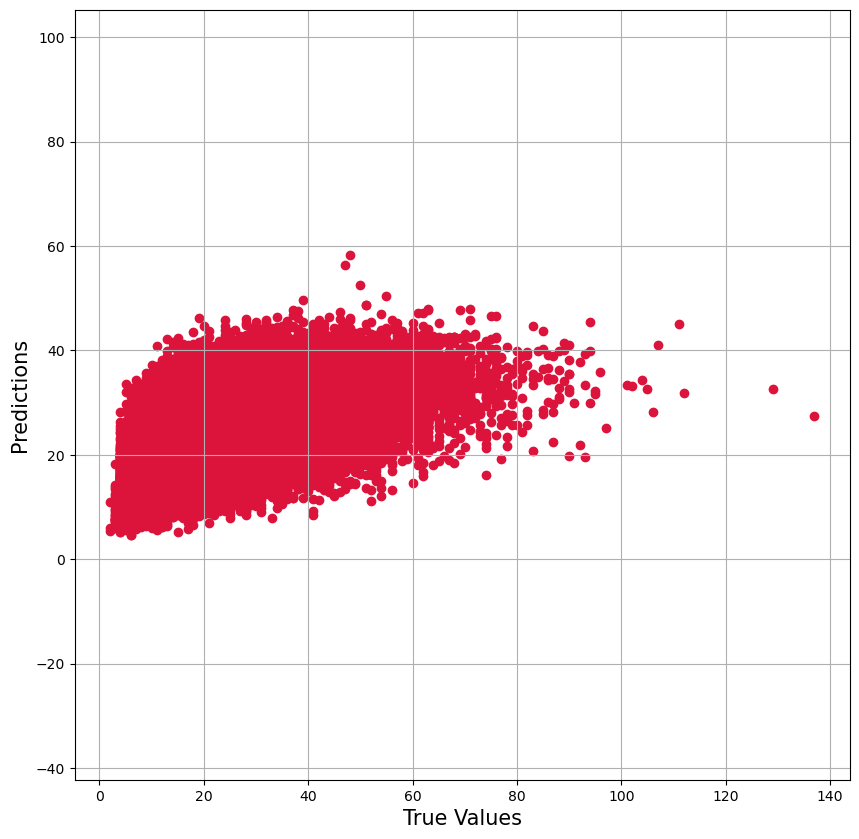

In [154]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, xgb_regressor.predict(X_val), c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.grid()
plt.show()